In [272]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import datetime as dt
import random
import time
import os 
import json
from tqdm import tqdm
# from thefuzz import fuzz, process
import powerlaw

import sqlite3

# !pip install mpmath 

def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    Parameters
    ----------
    degree (np.ndarray or list):
        a vector of length N that corresponds to the degree, k_i, of every
        node, v_i, in the network

    number_of_bins (int):
        length of output vectors
    
    log_binning (bool)
        if you are plotting on a log-log axis, then this is useful
    
    base (int):
        log base, defaults to 2
        
    Returns
    -------
    x, y (np.ndarray):
        the support and probability values of the degree distribution
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [3]:
del net_2008
del net_2012

NameError: name 'net_2008' is not defined

# Load Network

In [3]:
net_2008_presen = nx.read_gml("2008_pres_sen_consistent_nid_v1.gml")
# 5.5 min to load 2008
net_2012_presen = nx.read_gml("2012_pres_sen_consistent_nid_v1.gml")
# 9 min to load 2008

In [297]:
contrib_net = net_2012_presen

## basic stats

In [273]:
print(contrib_net)
print("Graph density:\t %1.9f" % nx.density(contrib_net))
# contrib_net.nodes(data=True)    2034 in 2008 has both in and out
contrib_net.nodes['5749'] #('1123', data=True)
# ~ 3 s 

DiGraph with 3054381 nodes and 5418590 edges
Graph density:	 0.000000581


KeyError: '5749'

In [298]:
weak_gc_list = max(nx.weakly_connected_components(contrib_net), key=len)
weak_gc_frac = (len(weak_gc_list) / contrib_net.number_of_nodes()) 

strong_gc_list = max(nx.strongly_connected_components(contrib_net), key=len)
strong_gc_frac = (len(strong_gc_list) / contrib_net.number_of_nodes()) 
# ~ 25 s

In [275]:
print('weak gc frac: ', weak_gc_frac)
print('strong gc frac: ', strong_gc_frac)

weak gc frac:  0.9991464719037998
strong gc frac:  9.494558799311547e-05


In [299]:
w_GCC = contrib_net.subgraph(weak_gc_list)
s_GCC = contrib_net.subgraph(strong_gc_list)
print(s_GCC.number_of_nodes())
print(len(strong_gc_list))
print(len(weak_gc_list))
avg_path = nx.average_shortest_path_length(s_GCC)
print(avg_path)
# 1776036 - 1772536

290
290
3051774
4.010320964085431


In [ ]:
# sorted(dict(s_GCC.degree()))

sorted_s_gc = sorted(dict(s_GCC.degree()).items(), key=lambda x:x[1], reverse=True)
print(sorted_s_gc)

In [269]:
contrib_net.nodes['250']

KeyError: '250'

# Degrees

In [324]:
degree = contrib_net.degree()
in_degree = contrib_net.in_degree()
out_degree = contrib_net.out_degree()

degree = dict(degree)
in_degree = dict(in_degree)
out_degree = dict(out_degree)

degree_list = list(degree.values())
in_degree_list = list(in_degree.values())
out_degree_list = list(out_degree.values())

## WEIGHTED
degree_weighted = contrib_net.degree(weight='weight')
in_degree_weighted = contrib_net.in_degree(weight='weight')
out_degree_weighted = contrib_net.out_degree(weight='weight')

degree_weighted = dict(degree_weighted)
in_degree_weighted = dict(in_degree_weighted)
out_degree_weighted = dict(out_degree_weighted)

degree_list_weighted = list(degree_weighted.values())
in_degree_list_weighted = list(in_degree_weighted.values())
out_degree_list_weighted = list(out_degree_weighted.values())


print("Average degree: %1.9f" % np.mean(list(degree.values())))
print("Average in-degree: %1.9f" % np.mean(list(in_degree.values())))
print("Average out-degree: %1.9f" % np.mean(list(out_degree.values())))
print("")
print("Average degree: %1.2f" % np.mean(list(degree_weighted.values())))
print("Average in-degree: %1.3f" % np.mean(list(in_degree_weighted.values())))
print("Average out-degree: %1.3f" % np.mean(list(out_degree_weighted.values())))
# ~ 20 s

Average degree: 3.548077335
Average in-degree: 1.774038668
Average out-degree: 1.774038668

Average degree: 6831.61
Average in-degree: 3415.807
Average out-degree: 3415.807


In [325]:
degree_2008 = dict(net_2008_presen.degree())
in_degree_2008 = dict(net_2008_presen.in_degree())
out_degree_2008 = dict(net_2008_presen.out_degree())

degree_list_2008 = list(degree_2008.values())
in_degree_list_2008 = list(in_degree_2008.values())
out_degree_list_2008 = list(out_degree_2008.values())

## WEIGHTED
degree_weighted_2008 = dict(net_2008_presen.degree(weight='weight'))
in_degree_weighted_2008 = dict(net_2008_presen.in_degree(weight='weight'))
out_degree_weighted_2008 = dict(net_2008_presen.out_degree(weight='weight'))

degree_list_weighted_2008 = list(degree_weighted_2008.values())
in_degree_list_weighted_2008 = list(in_degree_weighted_2008.values())
out_degree_list_weighted_2008 = list(out_degree_weighted_2008.values())

###

degree_2012 = dict(net_2012_presen.degree())
in_degree_2012 = dict(net_2012_presen.in_degree())
out_degree_2012 = dict(net_2012_presen.out_degree())

degree_list_2012 = list(degree_2012.values())
in_degree_list_2012 = list(in_degree_2012.values())
out_degree_list_2012 = list(out_degree_2012.values())

## WEIGHTED
degree_weighted_2012 = dict(net_2012_presen.degree(weight='weight'))
in_degree_weighted_2012 = dict(net_2012_presen.in_degree(weight='weight'))
out_degree_weighted_2012 = dict(net_2012_presen.out_degree(weight='weight'))

degree_list_weighted_2012 = list(degree_weighted_2012.values())
in_degree_list_weighted_2012 = list(in_degree_weighted_2012.values())
out_degree_list_weighted_2012 = list(out_degree_weighted_2012.values())

# ~ 1 min

# plot unweighted degrees

In [22]:
all_degree_fit = powerlaw.Fit(degree_list)
print(all_degree_fit.power_law.alpha)
in_degree_fit = powerlaw.Fit(in_degree_list)
print(in_degree_fit.power_law.alpha)
out_degree_fit = powerlaw.Fit(out_degree_list)
print(out_degree_fit.power_law.alpha)
# ~2 s

Calculating best minimal value for power law fit
1.7341568124878224


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.8665124950820733


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
3.916256628303615%


In [29]:
x_all_degree, y_all_degree = plot_degree(degree_list, number_of_bins=50, log_binning=True, base=2)
x_in_degree, y_in_degree = plot_degree(in_degree_list, number_of_bins=50, log_binning=True, base=2)
x_out_degree, y_out_degree = plot_degree(out_degree_list, number_of_bins=50, log_binning=True, base=2)

# np.log10(max(degree_list))

fit_x = np.logspace(0, np.log10(max(degree_list)), num=100)
all_fit_y = fit_x**-all_degree_fit.power_law.alpha
in_fit_y = fit_x**-in_degree_fit.power_law.alpha
out_fit_y = fit_x**-out_degree_fit.power_law.alpha

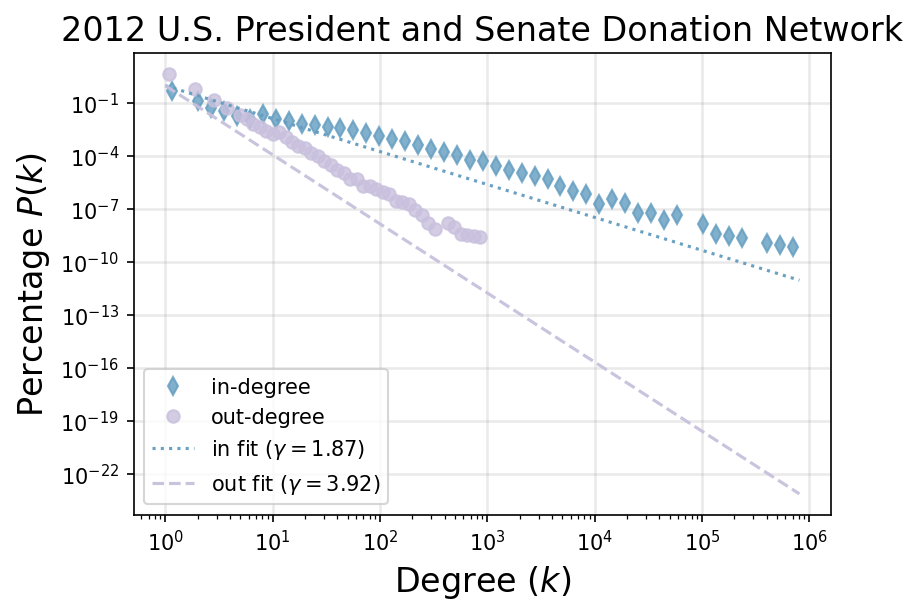

In [30]:
colors = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x_all_degree, y_all_degree,'.', color=colors[4], label='all', alpha=0.8)
ax.loglog(x_in_degree, y_in_degree,'d', color=colors[1], label='in-degree', alpha=0.8)
ax.loglog(x_out_degree, y_out_degree,'o', color=colors[2], label='out-degree', alpha=0.8)

# ax.loglog(fit_x, all_fit_y, linestyle='dashdot', color=colors[4], label='all fit', alpha=0.95)
ax.loglog(fit_x, in_fit_y,linestyle='dotted', color=colors[1], label=r'in fit ($\gamma = 1.87$)', alpha=0.95)
ax.loglog(fit_x, out_fit_y,'--', color=colors[2], label=r'out fit ($\gamma = 3.92$)', alpha=0.95)

ax.set_xlabel(r"Degree ($k$)", fontsize=16)
ax.set_ylabel(r"Percentage $P(k)$", fontsize=16)

ax.set_title(r"2012 U.S. President and Senate Donation Network", fontsize=16)

ax.legend(fontsize=10, loc='lower left')

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

## both year unweighted

In [333]:
in_degree_fit_2008 = powerlaw.Fit(in_degree_list_2008)
print(in_degree_fit_2008.power_law.alpha)
out_degree_fit_2008 = powerlaw.Fit(out_degree_list_2008)
print(out_degree_fit_2008.power_law.alpha)

in_degree_fit_2012 = powerlaw.Fit(in_degree_list_2012)
print(in_degree_fit_2012.power_law.alpha)
out_degree_fit_2012 = powerlaw.Fit(out_degree_list_2012)
print(out_degree_fit_2012.power_law.alpha)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.9799379820762142
Calculating best minimal value for power law fit
3.2324827577588304


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.8665125044899833
Calculating best minimal value for power law fit
3.916256628303615%


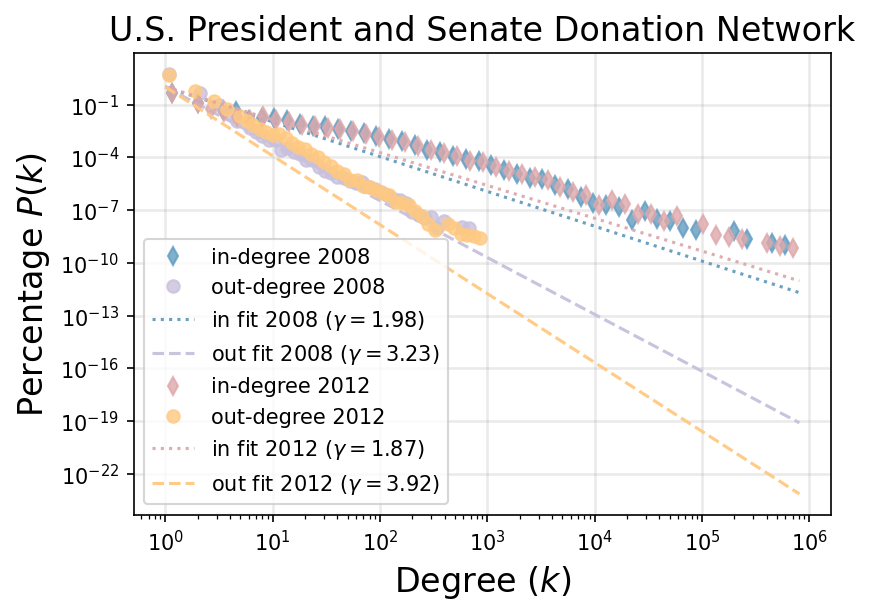

: 

In [334]:
# x_all_degree_2008, y_all_degree_2008 = plot_degree(degree_list, number_of_bins=50, log_binning=True, base=2)
x_in_degree_2008, y_in_degree_2008 = plot_degree(in_degree_list_2008, number_of_bins=50, log_binning=True, base=2)
x_out_degree_2008, y_out_degree_2008 = plot_degree(out_degree_list_2008, number_of_bins=50, log_binning=True, base=2)
x_in_degree_2012, y_in_degree_2012 = plot_degree(in_degree_list_2012, number_of_bins=50, log_binning=True, base=2)
x_out_degree_2012, y_out_degree_2012 = plot_degree(out_degree_list_2012, number_of_bins=50, log_binning=True, base=2)

fit_x = np.logspace(0, np.log10(max(degree_list_2012)), num=100)
# all_fit_y_2008 = fit_x**-all_degree_fit.power_law.alpha
in_fit_y_2008 = fit_x**-in_degree_fit_2008.power_law.alpha
out_fit_y_2008 = fit_x**-out_degree_fit_2008.power_law.alpha
in_fit_y_2012 = fit_x**-in_degree_fit_2012.power_law.alpha
out_fit_y_2012 = fit_x**-out_degree_fit_2012.power_law.alpha

colors = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x_all_degree, y_all_degree,'.', color=colors[4], label='all', alpha=0.8)
ax.loglog(x_in_degree_2008, y_in_degree_2008,'d', color=colors[1], label='in-degree 2008', alpha=0.8)
ax.loglog(x_out_degree_2008, y_out_degree_2008,'o', color=colors[2], label='out-degree 2008', alpha=0.8)

ax.loglog(fit_x, in_fit_y_2008, linestyle='dotted', color=colors[1], label=r'in fit 2008 ($\gamma = 1.98$)', alpha=0.95)
ax.loglog(fit_x, out_fit_y_2008,'--', color=colors[2], label=r'out fit 2008 ($\gamma = 3.23$)', alpha=0.95)

ax.loglog(x_in_degree_2012, y_in_degree_2012,'d', color=colors[3], label='in-degree 2012', alpha=0.8)
ax.loglog(x_out_degree_2012, y_out_degree_2012,'o', color=colors[4], label='out-degree 2012', alpha=0.8)

ax.loglog(fit_x, in_fit_y_2012, linestyle='dotted', color=colors[3], label=r'in fit 2012 ($\gamma = 1.87$)', alpha=0.95)
ax.loglog(fit_x, out_fit_y_2012,'--', color=colors[4], label=r'out fit 2012 ($\gamma = 3.92$)', alpha=0.95)

ax.set_xlabel(r"Degree ($k$)", fontsize=16)
ax.set_ylabel(r"Percentage $P(k)$", fontsize=16)

ax.set_title(r"U.S. President and Senate Donation Network", fontsize=16)

ax.legend(fontsize=10, loc='lower left')

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

# plot weighted degree

In [24]:
# all_degree_fit_weighted = powerlaw.Fit([int(x) for x in degree_list_weighted])
# print(all_degree_fit_weighted.power_law.alpha)
in_degree_fit_weighted = powerlaw.Fit([int(x) for x in in_degree_list_weighted])
print(in_degree_fit_weighted.power_law.alpha)
out_degree_fit_weighted = powerlaw.Fit([int(x) for x in out_degree_list_weighted])
print(out_degree_fit_weighted.power_law.alpha)
# run time 2008: ~ 2 mins 

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.7893292022511238


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.9821987609123073


In [31]:
x_all_degree_weighted, y_all_degree_weighted = plot_degree(degree_list_weighted, number_of_bins=50, log_binning=True, base=2)
x_in_degree_weighted, y_in_degree_weighted = plot_degree(in_degree_list_weighted, number_of_bins=50, log_binning=True, base=2)
x_out_degree_weighted, y_out_degree_weighted = plot_degree(out_degree_list_weighted, number_of_bins=50, log_binning=True, base=2)

# np.log10(max(degree_list))

fit_weighted_x = np.logspace(0, np.log10(max(degree_list_weighted)), num=100)
# all_weighted_fit_y = fit_weighted_x**-all_degree_fit_weighted.power_law.alpha
in_weighted_fit_y = fit_weighted_x**-in_degree_fit_weighted.power_law.alpha
out_weighted_fit_y = fit_weighted_x**-out_degree_fit_weighted.power_law.alpha

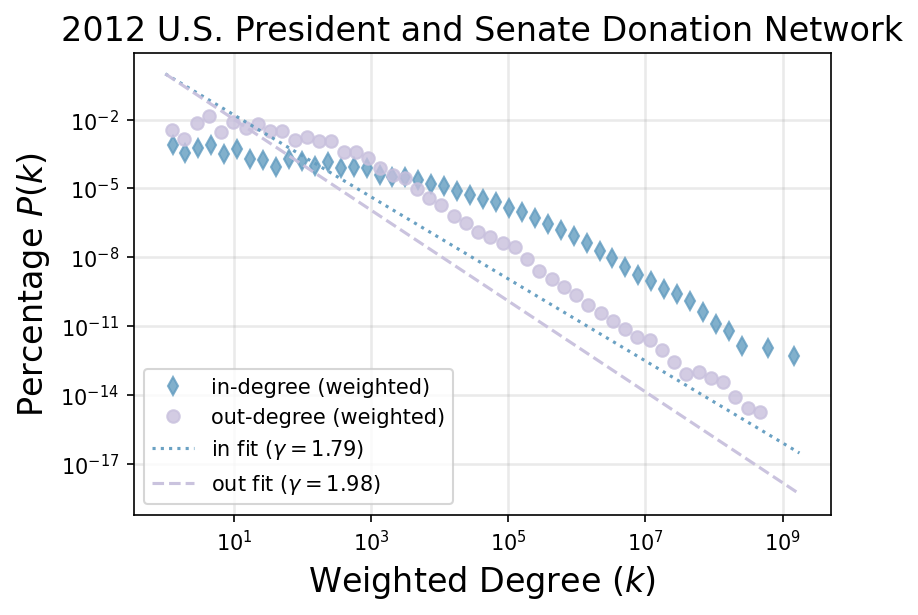

In [33]:
colors = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x_all_degree_weighted, y_all_degree_weighted,'.', color=colors[4], label='weighted all', alpha=0.8)
ax.loglog(x_in_degree_weighted, y_in_degree_weighted,'d', color=colors[1], label='in-degree (weighted)', alpha=0.8)
ax.loglog(x_out_degree_weighted, y_out_degree_weighted,'o', color=colors[2], label='out-degree (weighted)', alpha=0.8)

# ax.loglog(fit_weighted_x, all_weighted_fit_y, linestyle='dashdot', color=colors[4], label='all fit', alpha=0.95)
ax.loglog(fit_weighted_x, in_weighted_fit_y, linestyle='dotted', color=colors[1], label=r'in fit ($\gamma = 1.79$)', alpha=0.95)
ax.loglog(fit_weighted_x, out_weighted_fit_y,'--', color=colors[2], label=r'out fit ($\gamma = 1.98$)', alpha=0.95)

ax.set_xlabel(r"Weighted Degree ($k$)", fontsize=16)
ax.set_ylabel(r"Percentage $P(k)$", fontsize=16)

ax.set_title(r"2012 U.S. President and Senate Donation Network", fontsize=16)

ax.legend(fontsize=10, loc='lower left')

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

## both year weighted

In [327]:
in_degree_fit_weighted_2008 = powerlaw.Fit([int(x) for x in in_degree_list_weighted_2008])
print(in_degree_fit_weighted_2008.power_law.alpha)
out_degree_fit_weighted_2008 = powerlaw.Fit([int(x) for x in out_degree_list_weighted_2008])
print(out_degree_fit_weighted_2008.power_law.alpha)

in_degree_fit_weighted_2012 = powerlaw.Fit([int(x) for x in in_degree_list_weighted_2012])
print(in_degree_fit_weighted_2012.power_law.alpha)
out_degree_fit_weighted_2012 = powerlaw.Fit([int(x) for x in out_degree_list_weighted_2012])
print(out_degree_fit_weighted_2012.power_law.alpha)
#  ~ 4 mins

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.8149077745272086


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.9327707490112114


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.7893292022511238


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
1.9821987598032682


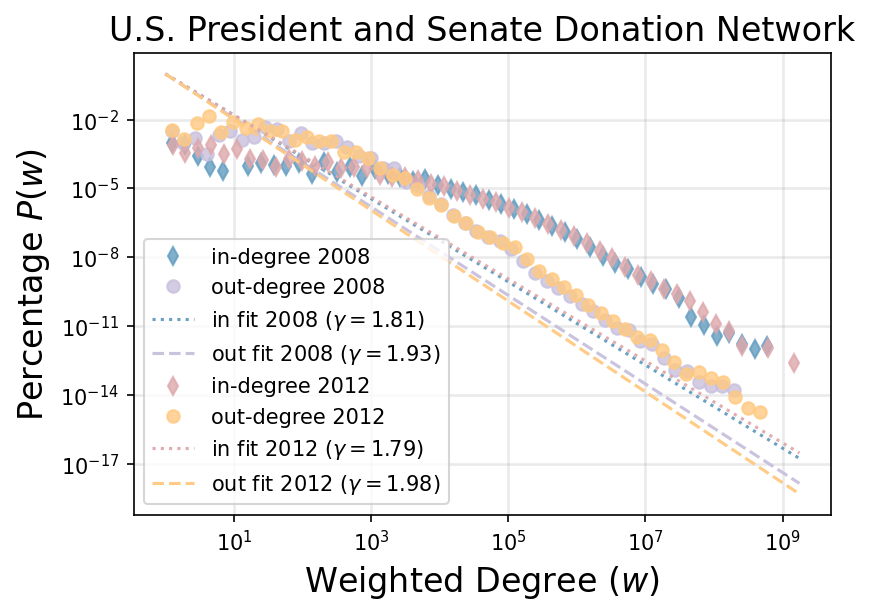

In [331]:
# x_all_degree_2008, y_all_degree_2008 = plot_degree(degree_list, number_of_bins=50, log_binning=True, base=2)
x_in_degree_weighted_2008, y_in_degree_weighted_2008 = plot_degree(in_degree_list_weighted_2008, number_of_bins=50, log_binning=True, base=2)
x_out_degree_weighted_2008, y_out_degree_weighted_2008 = plot_degree(out_degree_list_weighted_2008, number_of_bins=50, log_binning=True, base=2)
x_in_degree_weighted_2012, y_in_degree_weighted_2012 = plot_degree(in_degree_list_weighted_2012, number_of_bins=50, log_binning=True, base=2)
x_out_degree_weighted_2012, y_out_degree_weighted_2012 = plot_degree(out_degree_list_weighted_2012, number_of_bins=50, log_binning=True, base=2)

fit_x_weighted = np.logspace(0, np.log10(max(degree_list_weighted_2012)), num=100)
# all_fit_y_2008 = fit_x**-all_degree_fit.power_law.alpha
in_fit_y_weighted_2008 = fit_x_weighted**-in_degree_fit_weighted_2008.power_law.alpha
out_fit_y_weighted_2008 = fit_x_weighted**-out_degree_fit_weighted_2008.power_law.alpha
in_fit_y_weighted_2012 = fit_x_weighted**-in_degree_fit_weighted_2012.power_law.alpha
out_fit_y_weighted_2012 = fit_x_weighted**-out_degree_fit_weighted_2012.power_law.alpha

colors = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x_all_degree, y_all_degree,'.', color=colors[4], label='all', alpha=0.8)
ax.plot(x_in_degree_weighted_2008, y_in_degree_weighted_2008,'d', color=colors[1], label='in-degree 2008', alpha=0.8)
ax.plot(x_out_degree_weighted_2008, y_out_degree_weighted_2008,'o', color=colors[2], label='out-degree 2008', alpha=0.8)

ax.plot(fit_x_weighted, in_fit_y_weighted_2008, linestyle='dotted', color=colors[1], label=r'in fit 2008 ($\gamma = 1.81$)', alpha=0.95)
ax.plot(fit_x_weighted, out_fit_y_weighted_2008,'--', color=colors[2], label=r'out fit 2008 ($\gamma = 1.93$)', alpha=0.95)

ax.plot(x_in_degree_weighted_2012, y_in_degree_weighted_2012,'d', color=colors[3], label='in-degree 2012', alpha=0.8)
ax.plot(x_out_degree_weighted_2012, y_out_degree_weighted_2012,'o', color=colors[4], label='out-degree 2012', alpha=0.8)

ax.plot(fit_x_weighted, in_fit_y_weighted_2012, linestyle='dotted', color=colors[3], label=r'in fit 2012 ($\gamma = 1.79$)', alpha=0.95)
ax.plot(fit_x_weighted, out_fit_y_weighted_2012,'--', color=colors[4], label=r'out fit 2012 ($\gamma = 1.98$)', alpha=0.95)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r"Weighted Degree ($w$)", fontsize=16)
ax.set_ylabel(r"Percentage $P(w)$", fontsize=16)

ax.set_title(r"U.S. President and Senate Donation Network", fontsize=16)

ax.legend(fontsize=10, loc='lower left')

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

# edge weight distribution

In [300]:
edge_list_2008 = list(net_2008_presen.edges.data("weight", default=0))
# print(type(edge_list_2008))
# print(edge_list_2008[0:100])

edge_weight_list_2008 = [x[2] for x in edge_list_2008]
# edge_weight_list_2008
x_edge_weights_2008, y_edge_weights_2008 = plot_degree(edge_weight_list_2008, number_of_bins=50, log_binning=True, base=2)

## 2012
edge_list_2012 = list(net_2012_presen.edges.data("weight", default=0))
edge_weight_list_2012 = [x[2] for x in edge_list_2012]
x_edge_weights_2012, y_edge_weights_2012 = plot_degree(edge_weight_list_2012, number_of_bins=50, log_binning=True, base=2)


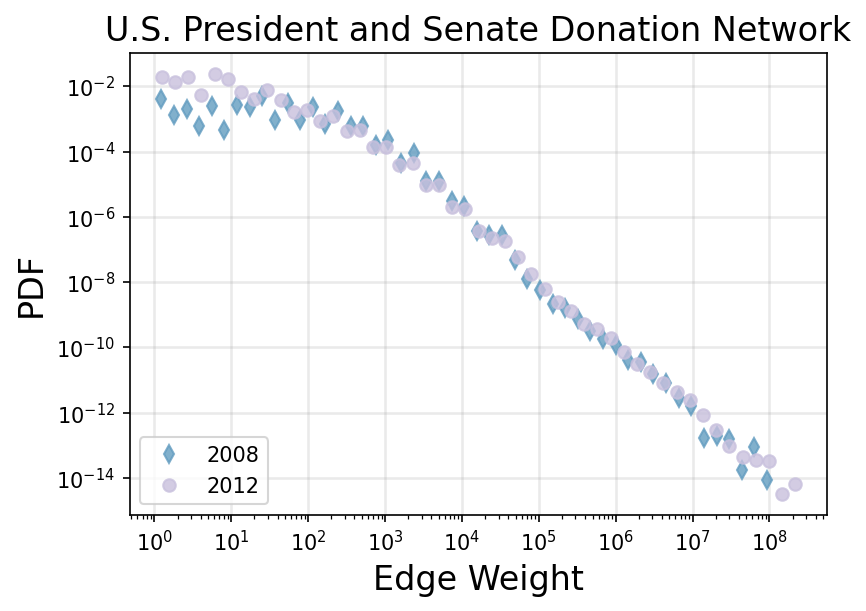

In [314]:
colors = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x_all_degree, y_all_degree,'.', color=colors[4], label='all', alpha=0.8)
ax.loglog(x_edge_weights_2008, y_edge_weights_2008,'d', color=colors[1], label='2008', alpha=0.8)
ax.loglog(x_edge_weights_2012, y_edge_weights_2012,'o', color=colors[2], label='2012', alpha=0.8)

# ax.loglog(fit_x_weighted, in_fit_y_weighted_2008, linestyle='dotted', color=colors[1], label=r'in fit 2008 ($\gamma = 1.98$)', alpha=0.95)
# ax.loglog(fit_x_weighted, out_fit_y_weighted_2008,'--', color=colors[2], label=r'out fit 2008 ($\gamma = 1.93$)', alpha=0.95)

# ax.loglog(x_in_degree_weighted_2012, y_in_degree_weighted_2012,'d', color=colors[3], label='in-degree 2012', alpha=0.8)
# ax.loglog(x_out_degree_weighted_2012, y_out_degree_weighted_2012,'o', color=colors[4], label='out-degree 2012', alpha=0.8)

# ax.loglog(fit_x_weighted, in_fit_y_weighted_2012, linestyle='dotted', color=colors[3], label=r'in fit 2012 ($\gamma = 1.79$)', alpha=0.95)
# ax.loglog(fit_x_weighted, out_fit_y_weighted_2012,'--', color=colors[4], label=r'out fit 2012 ($\gamma = 1.98$)', alpha=0.95)

ax.set_xlabel(r"Edge Weight", fontsize=16)
ax.set_ylabel(r"PDF", fontsize=16)

ax.set_title(r"U.S. President and Senate Donation Network", fontsize=16)

ax.legend(fontsize=10, loc='lower left')

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

# Partisan recipient edge weights

In [219]:
print(net_2008_presen.nodes(data="partisan_recipient")['17664'])
print(list(net_2008_presen.nodes(data="partisan_recipient"))[0:10])
# type(net_2008_presen.nodes(data="partisan_recipient"))
(net_2008_presen.nodes['17664'])

0.94
[('2', None), ('17664', 0.94), ('5', None), ('16078', 1.15), ('17779', 1.36), ('6', None), ('17033', nan), ('17556', nan), ('8', None), ('17434', 1.24)]


{'name_recipient': 'ROMNEY, MITT',
 'cand_comm': 'CAND',
 'party_recipient': '200',
 'state_recipient': 'TX',
 'partisan_recipient': 0.94,
 'seat': 'federal:president',
 'name_contributor': 'romney, mitt',
 'corp_ind': 'I',
 'gender_contributor': 'M',
 'state_contributor': 'MA',
 'occupation_standardized': 'None',
 'occupation_writen': 'businessman',
 'partisan_contributor': 0.99}

In [315]:
def try_float(v):
   try:
       return float(v)
   except Exception:
       return np.nan

repub_recip_2008_list = [n for n,v in net_2008_presen.nodes(data="partisan_recipient") if (try_float(v) > 0)]  
print(len(repub_recip_2008_list))
print(repub_recip_2008_list)
print(net_2008_presen.nodes[repub_recip_2008_list[0]])

democ_recip_2008_list = [n for n,v in net_2008_presen.nodes(data="partisan_recipient") if (try_float(v) < 0)]  
print(len(democ_recip_2008_list))
print(democ_recip_2008_list)
print(net_2008_presen.nodes[democ_recip_2008_list[0]])

repub_recip_2012_list = [n for n,v in net_2012_presen.nodes(data="partisan_recipient") if (try_float(v) > 0)]  
print(len(repub_recip_2012_list))
print(repub_recip_2012_list)
print(net_2012_presen.nodes[repub_recip_2012_list[0]])

democ_recip_2012_list = [n for n,v in net_2012_presen.nodes(data="partisan_recipient") if (try_float(v) < 0)]  
print(len(democ_recip_2012_list))
print(democ_recip_2012_list)
print(net_2012_presen.nodes[democ_recip_2012_list[0]])
# ~ 13 secs

1259
['17664', '16078', '17779', '17434', '18355', '15851', '15922', '16266', '18550', '18954', '17104', '17799', '20577', '47123', '17952', '17036', '17616', '17925', '15695', '19024', '16175', '15709', '15918', '18236', '20284', '47139', '47338', '18447', '15732', '18548', '17715', '47286', '15899', '1749', '47154', '20176', '20025', '15786', '17272', '18630', '19506', '15838', '16642', '18546', '18998', '18587', '15767', '18915', '17890', '18356', '19420', '21181', '47293', '18095', '18701', '20723', '13082', '18094', '5376', '18469', '15857', '16210', '15723', '18492', '16382', '17450', '19714', '4624', '18481', '18471', '15825', '17891', '29206', '17894', '15817', '16111', '16039', '18070', '18689', '16364', '18547', '17154', '16206', '1060', '18555', '1279', '47227', '15845', '18629', '18749', '18529', '15785', '15981', '18084', '18684', '19610', '17468', '15722', '21240', '16062', '18037', '15694', '16056', '15730', '16270', '29599', '47266', '18593', '15757', '18933', '15822', 

In [247]:
# repub_recip_2008_net = net_2008_presen.subgraph(repub_recip_2008_list)
# print(repub_recip_2008_net.nodes(data=True))

# democ_recip_2008_net = net_2008_presen.subgraph(democ_recip_2008_list)
# print(democ_recip_2008_net.nodes(data=True))

# repub_recip_2012_net = net_2012_presen.subgraph(repub_recip_2012_list)
# print(repub_recip_2012_net.nodes(data=True))

# democ_recip_2012_net = net_2012_presen.subgraph(democ_recip_2012_list)
# print(democ_recip_2012_net.nodes(data=True))


[('18944', {'name_recipient': 'SUNSHINE PAC', 'cand_comm': 'COMM', 'party_recipient': 'None', 'state_recipient': 'DC', 'partisan_recipient': 0.74, 'seat': 'federal:committee'}), ('19227', {'name_recipient': 'REED, CHRISTOPHER', 'cand_comm': 'CAND', 'party_recipient': '200', 'state_recipient': 'IA', 'partisan_recipient': 1.46, 'seat': 'federal:senate'}), ('47380', {'name_recipient': 'Scott Jensen Legal Defense Fund', 'cand_comm': 'COMM', 'party_recipient': 'None', 'state_recipient': 'WI', 'partisan_recipient': 1.69, 'seat': 'federal:527'}), ('30192', {'name_recipient': "SOUTH TEXANS' PROPERTY RIGHTS ASSOCIATION FEDPAC", 'cand_comm': 'COMM', 'party_recipient': 'None', 'state_recipient': 'TX', 'partisan_recipient': 1.33, 'seat': 'federal:committee'}), ('29237', {'name_recipient': 'CASS COUNTY REPUBLICAN CENTRAL COMMITTEE', 'cand_comm': 'COMM', 'party_recipient': '200', 'state_recipient': 'IN', 'partisan_recipient': 1.49, 'seat': 'federal:committee'}), ('30317', {'name_recipient': 'CLARK A

In [248]:
# ## 2008 rep recip
# repub_recip_edge_list_2008 = list(repub_recip_2008_net.edges.data("weight", default=0))
# repub_recip_edge_weight_list_2008 = [x[2] for x in repub_recip_edge_list_2008]
# x_repub_recip_edge_weights_2008, y_repub_recip_edge_weights_2008 = plot_degree(repub_recip_edge_weight_list_2008, number_of_bins=50, log_binning=True, base=2)

# ## 2008 dem recip
# democ_recip_edge_list_2008 = list(democ_recip_2008_net.edges.data("weight", default=0))
# democ_recip_edge_weight_list_2008 = [x[2] for x in democ_recip_edge_list_2008]
# x_democ_recip_edge_weights_2008, y_democ_recip_edge_weights_2008 = plot_degree(democ_recip_edge_weight_list_2008, number_of_bins=50, log_binning=True, base=2)

# ## 2012 rep recip
# repub_recip_edge_list_2012 = list(repub_recip_2012_net.edges.data("weight", default=0))
# repub_recip_edge_weight_list_2012 = [x[2] for x in repub_recip_edge_list_2012]
# x_repub_recip_edge_weights_2012, y_repub_recip_edge_weights_2012 = plot_degree(repub_recip_edge_weight_list_2012, number_of_bins=50, log_binning=True, base=2)

# ## 2008 dem recip
# democ_recip_edge_list_2012 = list(democ_recip_2012_net.edges.data("weight", default=0))
# democ_recip_edge_weight_list_2012 = [x[2] for x in democ_recip_edge_list_2012]
# x_democ_recip_edge_weights_2012, y_democ_recip_edge_weights_2012 = plot_degree(democ_recip_edge_weight_list_2012, number_of_bins=50, log_binning=True, base=2)


In [316]:
# rr_edges_2008 = net_2008_presen.in_edges(repub_recip_2008_list, data='weight')
# list(rr_edges)[0:10] #['weight'])
# repub_recip_edge_weight_list_2008 = [x[2] for x in list(rr_edges_2008)]

## 2008 rep recip
# repub_recip_edge_list_2008 = list(repub_recip_2008_net.edges.data("weight", default=0))
rr_edges_2008 = net_2008_presen.in_edges(repub_recip_2008_list, data='weight')
repub_recip_edge_weight_list_2008 = [x[2] for x in list(rr_edges_2008)]
x_repub_recip_edge_weights_2008, y_repub_recip_edge_weights_2008 = plot_degree(repub_recip_edge_weight_list_2008, number_of_bins=50, log_binning=True, base=2)

## 2008 dem recip
# democ_recip_edge_list_2008 = list(democ_recip_2008_net.edges.data("weight", default=0))
dr_edges_2008 = net_2008_presen.in_edges(democ_recip_2008_list, data='weight')
democ_recip_edge_weight_list_2008 = [x[2] for x in list(dr_edges_2008)]
x_democ_recip_edge_weights_2008, y_democ_recip_edge_weights_2008 = plot_degree(democ_recip_edge_weight_list_2008, number_of_bins=50, log_binning=True, base=2)

## 2012 rep recip
# repub_recip_edge_list_2012 = list(repub_recip_2012_net.edges.data("weight", default=0))
rr_edges_2012 = net_2012_presen.in_edges(repub_recip_2012_list, data='weight')
repub_recip_edge_weight_list_2012 = [x[2] for x in list(rr_edges_2012)]
x_repub_recip_edge_weights_2012, y_repub_recip_edge_weights_2012 = plot_degree(repub_recip_edge_weight_list_2012, number_of_bins=50, log_binning=True, base=2)

## 2008 dem recip
# democ_recip_edge_list_2012 = list(democ_recip_2012_net.edges.data("weight", default=0))
dr_edges_2012 = net_2012_presen.in_edges(democ_recip_2012_list, data='weight')
democ_recip_edge_weight_list_2012 = [x[2] for x in list(dr_edges_2012)]
x_democ_recip_edge_weights_2012, y_democ_recip_edge_weights_2012 = plot_degree(democ_recip_edge_weight_list_2012, number_of_bins=50, log_binning=True, base=2)

# ~8.8 secs

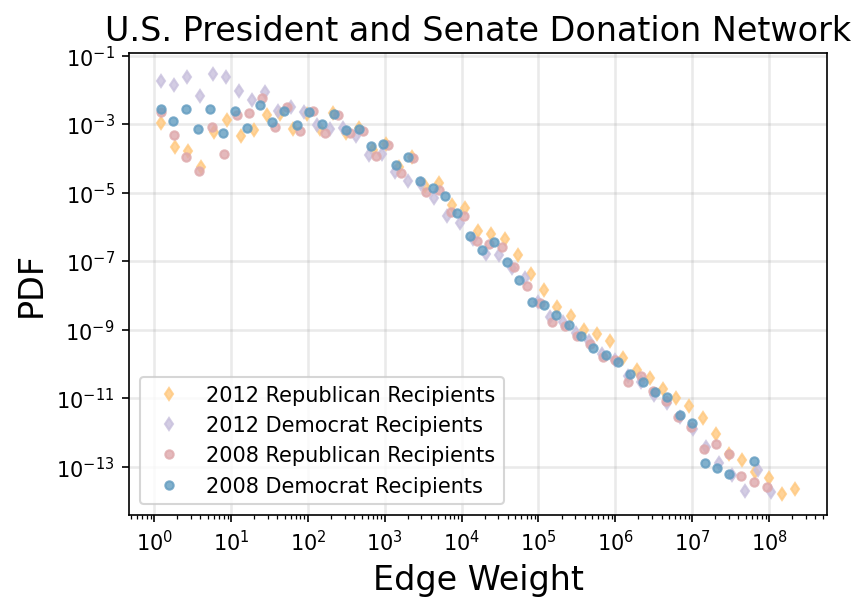

In [317]:
colors = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x_all_degree, y_all_degree,'.', color=colors[4], label='all', alpha=0.8)

ax.loglog(x_repub_recip_edge_weights_2012, y_repub_recip_edge_weights_2012,'d', color=colors[4], label='2012 Republican Recipients', alpha=0.8, markersize=4)
ax.loglog(x_democ_recip_edge_weights_2012, y_democ_recip_edge_weights_2012,'d', color=colors[2], label='2012 Democrat Recipients', alpha=0.8, markersize=4)
ax.loglog(x_repub_recip_edge_weights_2008, y_repub_recip_edge_weights_2008,'o', color=colors[3], label='2008 Republican Recipients', alpha=0.8, markersize=4)
ax.loglog(x_democ_recip_edge_weights_2008, y_democ_recip_edge_weights_2008,'o', color=colors[1], label='2008 Democrat Recipients', alpha=0.8, markersize=4)

# ax.loglog(fit_x_weighted, in_fit_y_weighted_2008, linestyle='dotted', color=colors[1], label=r'in fit 2008 ($\gamma = 1.98$)', alpha=0.95)
# ax.loglog(fit_x_weighted, out_fit_y_weighted_2008,'--', color=colors[2], label=r'out fit 2008 ($\gamma = 1.93$)', alpha=0.95)

# ax.loglog(x_in_degree_weighted_2012, y_in_degree_weighted_2012,'d', color=colors[3], label='in-degree 2012', alpha=0.8)
# ax.loglog(x_out_degree_weighted_2012, y_out_degree_weighted_2012,'o', color=colors[4], label='out-degree 2012', alpha=0.8)

# ax.loglog(fit_x_weighted, in_fit_y_weighted_2012, linestyle='dotted', color=colors[3], label=r'in fit 2012 ($\gamma = 1.79$)', alpha=0.95)
# ax.loglog(fit_x_weighted, out_fit_y_weighted_2012,'--', color=colors[4], label=r'out fit 2012 ($\gamma = 1.98$)', alpha=0.95)

ax.set_xlabel(r"Edge Weight", fontsize=16)
ax.set_ylabel(r"PDF", fontsize=16)

ax.set_title(r"U.S. President and Senate Donation Network", fontsize=16)

ax.legend(fontsize=10, loc='lower left')

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

# Partisan Contributor edge weights

In [318]:
def try_float(v):
   try:
       return float(v)
   except Exception:
       return np.nan

repub_contri_2008_list = [n for n,v in net_2008_presen.nodes(data="partisan_contributor") if (try_float(v) > 0)]  
print(len(repub_contri_2008_list))
print(repub_contri_2008_list[0:10])
# print(net_2008_presen.nodes[repub_recip_2008_list[0]])

democ_contri_2008_list = [n for n,v in net_2008_presen.nodes(data="partisan_contributor") if (try_float(v) < 0)]  
print(len(democ_contri_2008_list))
print(democ_contri_2008_list[0:10])
# print(net_2008_presen.nodes[democ_recip_2008_list[0]])

repub_contri_2012_list = [n for n,v in net_2012_presen.nodes(data="partisan_contributor") if (try_float(v) > 0)]  
print(len(repub_contri_2012_list))
print(repub_contri_2012_list[0:10])
# print(net_2012_presen.nodes[repub_recip_2012_list[0]])

democ_contri_2012_list = [n for n,v in net_2012_presen.nodes(data="partisan_contributor") if (try_float(v) < 0)]  
print(len(democ_contri_2012_list))
print(democ_contri_2012_list[0:10])
# print(net_2012_presen.nodes[democ_recip_2012_list[0]])



933923
['2', '17664', '5', '17779', '8', '33', '36', '15922', '16266', '18550']
1217311
['6', '10', '18254', '17', '15685', '32', '34', '15828', '40', '42']
875235
['3', '5', '17664', '17779', '29', '33', '65349', '36', '220', '16270']
1823574
['6', '16323', '16696', '17445', '20438', '10', '17783', '32', '18528', '34']


In [321]:


# repub_recip_2008_net = net_2008_presen.subgraph(repub_recip_2008_list)
# print(repub_recip_2008_net.nodes(data=True))

# democ_recip_2008_net = net_2008_presen.subgraph(democ_recip_2008_list)
# print(democ_recip_2008_net.nodes(data=True))

# repub_recip_2012_net = net_2012_presen.subgraph(repub_recip_2012_list)
# print(repub_recip_2012_net.nodes(data=True))

# democ_recip_2012_net = net_2012_presen.subgraph(democ_recip_2012_list)
# print(democ_recip_2012_net.nodes(data=True))



## 2008 rep recip
# repub_recip_edge_list_2008 = list(repub_recip_2008_net.edges.data("weight", default=0))
rc_edges_2008 = net_2008_presen.out_edges(repub_contri_2008_list, data='weight')
repub_contri_edge_weight_list_2008 = [x[2] for x in list(rc_edges_2008)]
x_repub_contri_edge_weights_2008, y_repub_contri_edge_weights_2008 = plot_degree(repub_contri_edge_weight_list_2008, number_of_bins=50, log_binning=True, base=2)

## 2008 dem recip
# democ_recip_edge_list_2008 = list(democ_recip_2008_net.edges.data("weight", default=0))
dc_edges_2008 = net_2008_presen.out_edges(democ_contri_2008_list, data='weight')
democ_contri_edge_weight_list_2008 = [x[2] for x in list(dc_edges_2008)]
x_democ_contri_edge_weights_2008, y_democ_contri_edge_weights_2008 = plot_degree(democ_contri_edge_weight_list_2008, number_of_bins=50, log_binning=True, base=2)

## 2012 rep recip
# repub_recip_edge_list_2012 = list(repub_recip_2012_net.edges.data("weight", default=0))
rc_edges_2012 = net_2012_presen.out_edges(repub_contri_2012_list, data='weight')
repub_contri_edge_weight_list_2012 = [x[2] for x in list(rc_edges_2012)]
x_repub_contri_edge_weights_2012, y_repub_contri_edge_weights_2012 = plot_degree(repub_contri_edge_weight_list_2012, number_of_bins=50, log_binning=True, base=2)

## 2008 dem recip
# democ_recip_edge_list_2012 = list(democ_recip_2012_net.edges.data("weight", default=0))
dc_edges_2012 = net_2012_presen.out_edges(democ_contri_2012_list, data='weight')
democ_contri_edge_weight_list_2012 = [x[2] for x in list(dc_edges_2012)]
x_democ_contri_edge_weights_2012, y_democ_contri_edge_weights_2012 = plot_degree(democ_contri_edge_weight_list_2012, number_of_bins=50, log_binning=True, base=2)


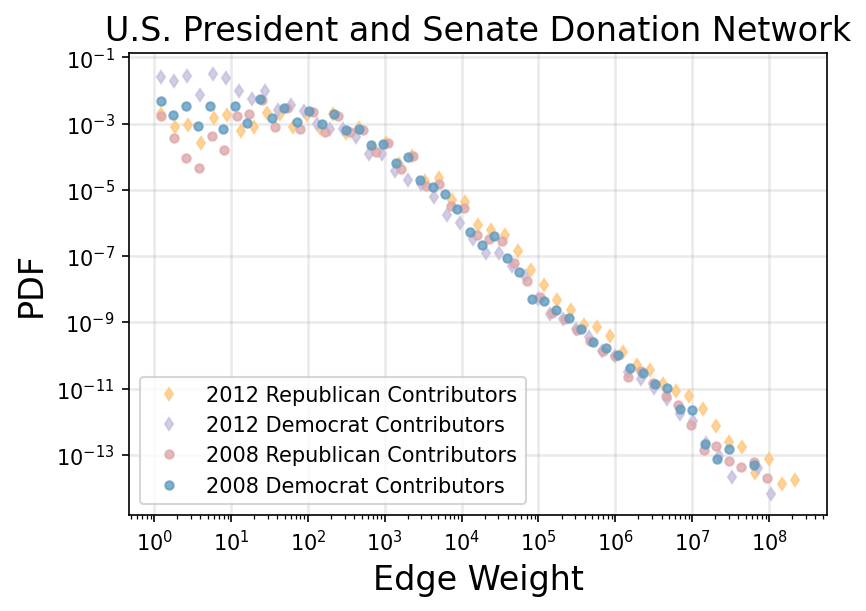

In [322]:
colors = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

# ax.loglog(x_all_degree, y_all_degree,'.', color=colors[4], label='all', alpha=0.8)

ax.loglog(x_repub_contri_edge_weights_2012, y_repub_contri_edge_weights_2012,'d', color=colors[4], label='2012 Republican Contributors', alpha=0.8, markersize=4)
ax.loglog(x_democ_contri_edge_weights_2012, y_democ_contri_edge_weights_2012,'d', color=colors[2], label='2012 Democrat Contributors', alpha=0.8, markersize=4)
ax.loglog(x_repub_contri_edge_weights_2008, y_repub_contri_edge_weights_2008,'o', color=colors[3], label='2008 Republican Contributors', alpha=0.8, markersize=4)
ax.loglog(x_democ_contri_edge_weights_2008, y_democ_contri_edge_weights_2008,'o', color=colors[1], label='2008 Democrat Contributors', alpha=0.8, markersize=4)

# ax.loglog(fit_x_weighted, in_fit_y_weighted_2008, linestyle='dotted', color=colors[1], label=r'in fit 2008 ($\gamma = 1.98$)', alpha=0.95)
# ax.loglog(fit_x_weighted, out_fit_y_weighted_2008,'--', color=colors[2], label=r'out fit 2008 ($\gamma = 1.93$)', alpha=0.95)

# ax.loglog(x_in_degree_weighted_2012, y_in_degree_weighted_2012,'d', color=colors[3], label='in-degree 2012', alpha=0.8)
# ax.loglog(x_out_degree_weighted_2012, y_out_degree_weighted_2012,'o', color=colors[4], label='out-degree 2012', alpha=0.8)

# ax.loglog(fit_x_weighted, in_fit_y_weighted_2012, linestyle='dotted', color=colors[3], label=r'in fit 2012 ($\gamma = 1.79$)', alpha=0.95)
# ax.loglog(fit_x_weighted, out_fit_y_weighted_2012,'--', color=colors[4], label=r'out fit 2012 ($\gamma = 1.98$)', alpha=0.95)

ax.set_xlabel(r"Edge Weight", fontsize=16)
ax.set_ylabel(r"PDF", fontsize=16)

ax.set_title(r"U.S. President and Senate Donation Network", fontsize=16)

ax.legend(fontsize=10, loc='lower left')

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

# plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

# preferential attachement

In [276]:
from collections import OrderedDict

both_year_nodes_set = set(list(net_2008_presen.nodes)).intersection(set(list(net_2012_presen.nodes)))
print(len(both_year_nodes_set))

degree_2008_pref = dict(net_2008_presen.degree(both_year_nodes_set))
degree_2012_pref = dict(net_2012_presen.degree(both_year_nodes_set))

degree_2008_pref_sorted = (sorted(degree_2008_pref.items(), key=lambda x:x[1]))
degree_2012_pref_sorted = (sorted(degree_2012_pref.items(), key=lambda x:x[1]))

print(degree_2008_pref_sorted[0:10])
print(degree_2012_pref_sorted[0:10])

degree_2008_pref_sorted = OrderedDict(degree_2008_pref_sorted)
degree_2012_pref_sorted = OrderedDict(degree_2012_pref_sorted)

914561
[('15891510', 1), ('12625089', 1), ('10687561', 1), ('15974286', 1), ('37083024', 1), ('9938182', 1), ('10210116', 1), ('15640561', 1), ('15677961', 1), ('34077228', 1)]
[('8782248', 1), ('15891510', 1), ('12625089', 1), ('10687561', 1), ('15468628', 1), ('15457426', 1), ('9938182', 1), ('15640561', 1), ('15677961', 1), ('36823820', 1)]


In [ ]:
# degree_2008_pref_sorted


In [ ]:
# degree_2012_pref_sorted

In [277]:
degree_change_dict = OrderedDict([(key, (degree_2012_pref_sorted[key] - degree_2008_pref_sorted.get(key, 0))) for key in degree_2008_pref_sorted.keys()])

In [ ]:
# degree_change_dict

In [278]:
degree_2008_pref_list = list(degree_2008_pref_sorted.values())
degree_change_list = list(degree_change_dict.values())

In [279]:
degree_change_cumm_list = np.cumsum(np.array(degree_change_list)).tolist()

Text(0.5, 0, 'degree (k)')

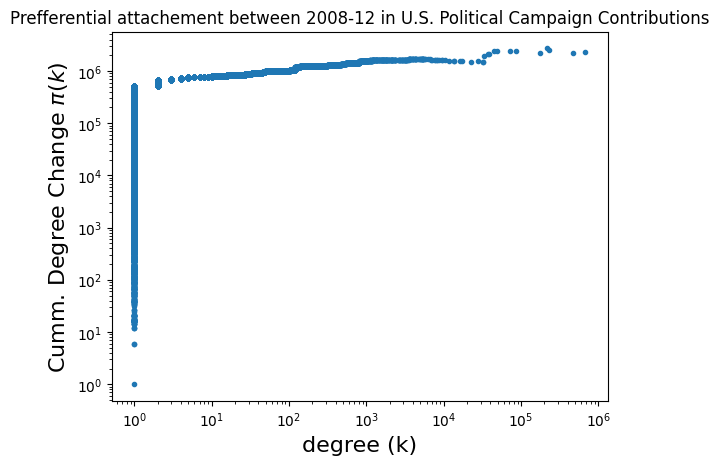

In [280]:
plt.plot(degree_2008_pref_list, degree_change_cumm_list, '.') #range(4,n+1),      , '.-'

plt.yscale('log')
plt.xscale('log')
# plt.xlim(1.5, 10**6)
# plt.ylim(4*10**5, 3*10**6)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"Cumm. Degree Change $\pi (k)$", fontsize=16)
plt.xlabel(r"degree (k)", fontsize=16)

Text(0.5, 0, 'Degree')

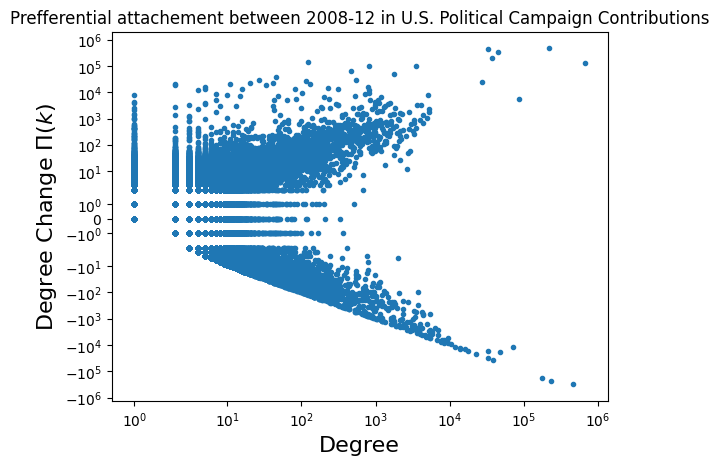

In [282]:
# degree_list

plt.plot(degree_2008_pref_list, degree_change_list, '.') #range(4,n+1),      , '.-'

# plt.xlim(-500, 10**4)
# plt.ylim(-10000, 1*10**4)

plt.yscale('symlog')
plt.xscale('symlog')
# plt.xlim(-20000, 0.8*10**6)
# plt.ylim(-0.4*10**6,0.55*10**6)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"Degree Change $\Pi (k)$", fontsize=16)
plt.xlabel(r"Degree", fontsize=16)

## pref attach IN

In [283]:
from collections import OrderedDict

both_year_nodes_set = set(list(net_2008_presen.nodes)).intersection(set(list(net_2012_presen.nodes)))
print(len(both_year_nodes_set))

in_degree_2008_pref = dict(net_2008_presen.in_degree(both_year_nodes_set))
in_degree_2012_pref = dict(net_2012_presen.in_degree(both_year_nodes_set))

in_degree_2008_pref_sorted = (sorted(in_degree_2008_pref.items(), key=lambda x:x[1]))
in_degree_2012_pref_sorted = (sorted(in_degree_2012_pref.items(), key=lambda x:x[1]))

# print(in_degree_2008_pref_sorted[0:10])
# print(in_degree_2012_pref_sorted[0:10])

in_degree_2008_pref_sorted = OrderedDict(in_degree_2008_pref_sorted)
in_degree_2012_pref_sorted = OrderedDict(in_degree_2012_pref_sorted)


in_degree_change_dict = OrderedDict([(key, (in_degree_2012_pref_sorted[key] - in_degree_2008_pref_sorted.get(key, 0))) 
                                     for key in in_degree_2008_pref_sorted.keys()])
in_degree_2008_pref_list = list(in_degree_2008_pref_sorted.values())
in_degree_change_list = list(in_degree_change_dict.values())
in_degree_change_cumm_list = np.cumsum(np.array(in_degree_change_list)).tolist()
# # 10 secs

914561


Text(0.5, 0, "In-Degree '08 (k)")

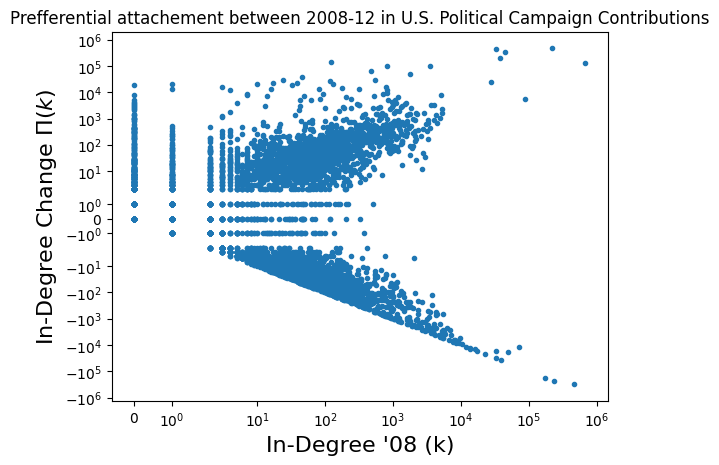

In [286]:
plt.plot((in_degree_2008_pref_list), in_degree_change_list, '.') #range(4,n+1),      , '.-'
plt.yscale('symlog')
plt.xscale('symlog')
# plt.ylim(0, 1*10**6)

# plt.xlim(-500, 10**4)
# plt.ylim(0, 1*10**6)

# plt.xlim(-20000, 0.8*10**6)
# plt.ylim(-0.4*10**6,0.55*10**6)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"In-Degree Change $\Pi (k)$", fontsize=16)
plt.xlabel(r"In-Degree '08 (k)", fontsize=16)

C:\Users\User\AppData\Local\Temp\ipykernel_7936\3672363659.py:3: RuntimeWarning: invalid value encountered in power
  plt.plot((in_degree_2008_pref_list), np.array(in_degree_change_list)**2**0.5, '.') #range(4,n+1),      , '.-'


Text(0.5, 0, "In-Degree '08 (k)")

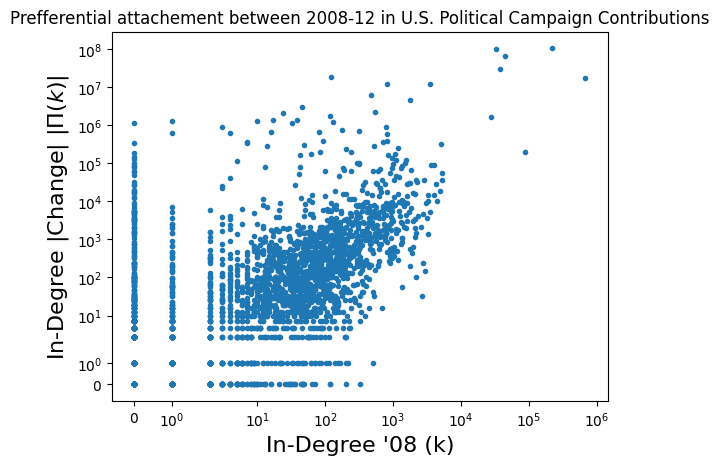

In [285]:
# degree_list

plt.plot((in_degree_2008_pref_list), np.array(in_degree_change_list)**2**0.5, '.') #range(4,n+1),      , '.-'
plt.yscale('symlog')
plt.xscale('symlog')
# plt.ylim(0, 1*10**6)

# plt.xlim(-500, 10**4)
# plt.ylim(0, 1*10**6)

# plt.xlim(-20000, 0.8*10**6)
# plt.ylim(-0.4*10**6,0.55*10**6)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"In-Degree |Change| $|\Pi (k)|$", fontsize=16)
plt.xlabel(r"In-Degree '08 (k)", fontsize=16)

Text(0.5, 0, "In-Degree '08 (k)")

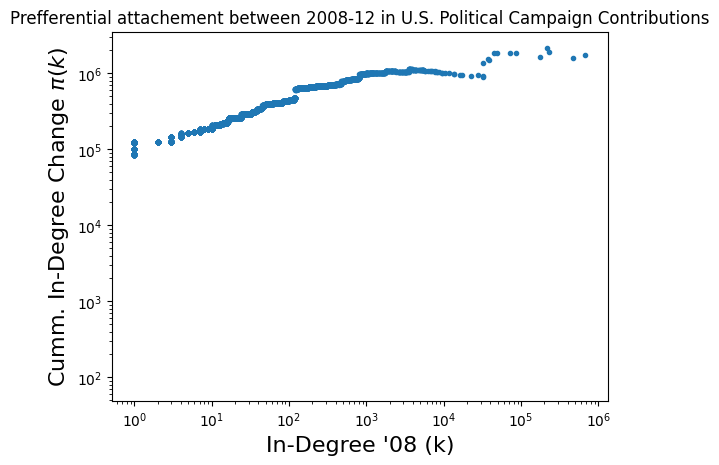

In [115]:
plt.plot(in_degree_2008_pref_list, in_degree_change_cumm_list, '.') #range(4,n+1),      , '.-'

plt.yscale('log')
plt.xscale('log')
# plt.xlim(1.5, 10**6)
# plt.ylim(4*10**5, 3*10**6)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"Cumm. In-Degree Change $\pi (k)$", fontsize=16)
plt.xlabel(r"In-Degree '08 (k)", fontsize=16)

## pref attach OUT

In [287]:
from collections import OrderedDict

both_year_nodes_set = set(list(net_2008_presen.nodes)).intersection(set(list(net_2012_presen.nodes)))
print(len(both_year_nodes_set))

out_degree_2008_pref = dict(net_2008_presen.out_degree(both_year_nodes_set))
out_degree_2012_pref = dict(net_2012_presen.out_degree(both_year_nodes_set))

out_degree_2008_pref_sorted = (sorted(out_degree_2008_pref.items(), key=lambda x:x[1]))
out_degree_2012_pref_sorted = (sorted(out_degree_2012_pref.items(), key=lambda x:x[1]))

# print(in_degree_2008_pref_sorted[0:10])
# print(in_degree_2012_pref_sorted[0:10])

out_degree_2008_pref_sorted = OrderedDict(out_degree_2008_pref_sorted)
out_degree_2012_pref_sorted = OrderedDict(out_degree_2012_pref_sorted)


out_degree_change_dict = OrderedDict([(key, (out_degree_2012_pref_sorted[key] - out_degree_2008_pref_sorted.get(key, 0))) 
                                     for key in out_degree_2008_pref_sorted.keys()])

## to be plotted
out_degree_2008_pref_list = list(out_degree_2008_pref_sorted.values())
out_degree_change_list = list(out_degree_change_dict.values())
out_degree_change_cumm_list = np.cumsum(np.array(out_degree_change_list)).tolist()

914561


Text(0.5, 0, "Out-Degree '08 (k)")

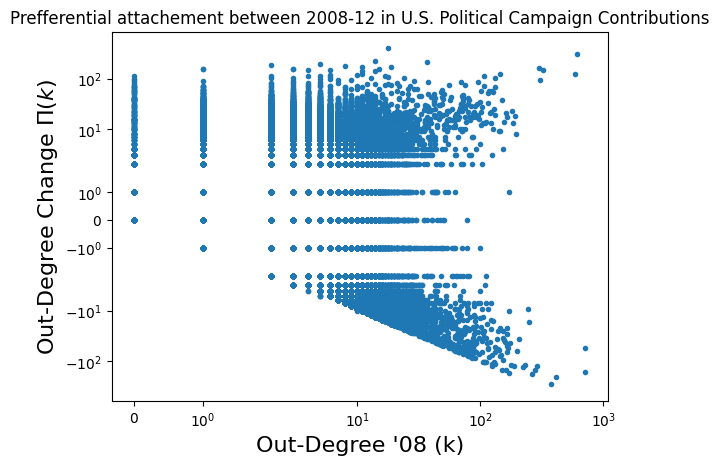

In [288]:
# degree_list  np.array(in_degree_change_list)**2**0.5
# plt.plot(np.log10(out_degree_2008_pref_list), np.log10(out_degree_change_list), '.')
plt.plot(out_degree_2008_pref_list, out_degree_change_list, '.') #range(4,n+1),      , '.-'
plt.yscale('symlog')
plt.xscale('symlog')
# plt.ylim(0, 5*10**2)

# plt.xlim(-500, 10**4)
# plt.ylim(4*10**-2, 5*10**2)

# plt.xlim(-20000, 0.8*10**6)
# plt.ylim(-0.4*10**6,0.55*10**6)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"Out-Degree Change $\Pi (k)$", fontsize=16)
plt.xlabel(r"Out-Degree '08 (k)", fontsize=16)

C:\Users\User\AppData\Local\Temp\ipykernel_7936\3118990348.py:3: RuntimeWarning: invalid value encountered in power
  plt.plot(out_degree_2008_pref_list, np.array(out_degree_change_list)**2**0.5, '.') #range(4,n+1),      , '.-'


Text(0.5, 0, "Out-Degree '08 (k)")

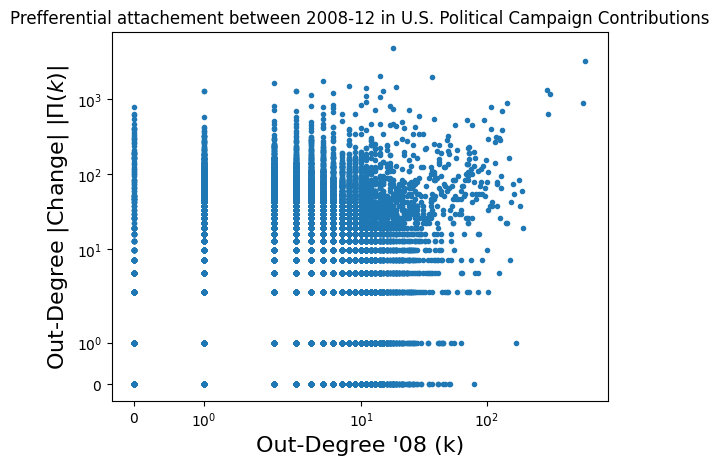

In [289]:
# degree_list  
# plt.plot(np.log10(out_degree_2008_pref_list), np.log10(out_degree_change_list), '.')
plt.plot(out_degree_2008_pref_list, np.array(out_degree_change_list)**2**0.5, '.') #range(4,n+1),      , '.-'
plt.yscale('symlog')
plt.xscale('symlog')
# plt.ylim(0, 5*10**2)

# plt.xlim(-500, 10**4)
# plt.ylim(4*10**-2, 5*10**2)

# plt.xlim(-20000, 0.8*10**6)
# plt.ylim(-0.4*10**6,0.55*10**6)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"Out-Degree |Change| $|\Pi (k)|$", fontsize=16)
plt.xlabel(r"Out-Degree '08 (k)", fontsize=16)

Text(0.5, 0, "Out-Degree '08 (k)")

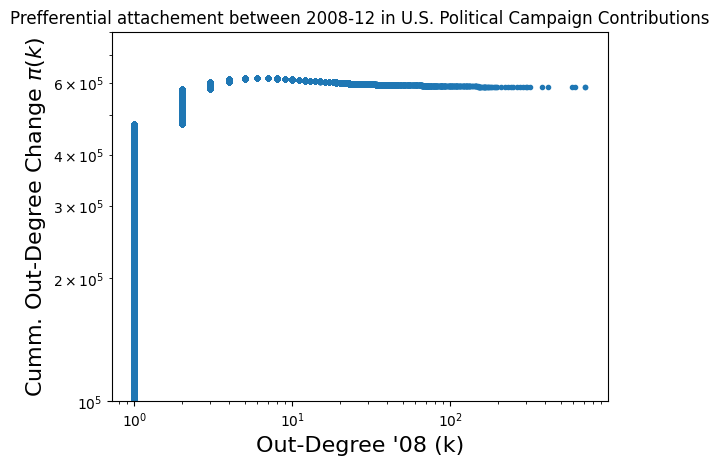

In [149]:
plt.plot(out_degree_2008_pref_list, out_degree_change_cumm_list, '.') #range(4,n+1),      , '.-'

plt.yscale('log')
plt.xscale('log')
# plt.xlim(1.5, 10**6)
plt.ylim(1*10**5, 8*10**5)
plt.title('Prefferential attachement between 2008-12 in U.S. Political Campaign Contributions')
plt.ylabel(r"Cumm. Out-Degree Change $\pi (k)$", fontsize=16)
plt.xlabel(r"Out-Degree '08 (k)", fontsize=16)

# betweennes and degree

In [ ]:
betweenness_dict = nx.betweenness_centrality(net_2008_presen, k = 100000, weight=None)
# ~ > 30 mins

# Clustering

In [ ]:
clustering_list = list(nx.clustering(net_2008_presen).values())
# avg_clustering = nx.average_clustering(contrib_net)
## run time = forever

trans = nx.transitivity(net_2008_presen)
# 2008 run time: ~ forever

print(avg_clustering)
print(trans)

In [241]:
# a_s = nx.to_numpy_array(net_2008_presen)

# need to make this unweighted, and undirected?
A = nx.to_scipy_sparse_array(net_2008_presen)
A3 = (A@A)@A
A3.trace()/6
# np.trace(A3.toarray())/6

1.9673145949744943e+19

In [240]:
# might be false...
A2 = A@A
np.triu(A2.toarray()).sum() - np.trace(A2.toarray())

1.9673145949744943e+19

In [ ]:
# degree_list

plt.plot(degree_list, clustering_list, '.') #range(4,n+1),      , '.-'

plt.yscale('log')
plt.xscale('log')
# plt.xlim(0, 10**5)
# plt.ylim(10**-4,2)
plt.title('clustering of 2008')
plt.ylabel(r"clustering", fontsize=16)
plt.xlabel(r"degree", fontsize=16)

# Community and modularity 

# Prepping for Gephi